In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import scipy
import copy
import pandas as pd
import seaborn as sns
from IPython.display import clear_output


Bad key text.latex.preview in file c:\RoboDK\Python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file c:\RoboDK\Python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file c:\RoboDK\Python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You probably need to get an

In [2]:
## Interpolate the curve points

def interp(points, closed_curve = False,k_=3,s_=0):
    if closed_curve:
        points = np.vstack((points,points[0]))
    tck, u = interpolate.splprep([points[:,0],points[:,1]], k=k_,s=s_)
    if closed_curve:
        u = np.linspace(0,1,num = 400,endpoint = True)
    else:
        u = np.linspace(0,1,num = 400,endpoint = False)
    interp_inner = interpolate.splev(u, tck)
    return interp_inner

def showInterp(interp_points,W=256,H=256,marker = 'r'):
    plt.plot(interp_points[0]*W,interp_points[1]*H,marker)
    plt.axis('off')


In [3]:
# Generating the butterfly parametric curve with n sampling point

def generate_points(gender, n):

    theta = 0
    points = np.zeros((n, 2))

    if gender=='male' :
        a, b = 1.0001, 0.9999
    elif gender=='female' :
        a, b = 0.9999, 1.0001
    else : 
        a, b = gender

    for i in range(n) :
        r = (a*np.cos(5*theta))**2 + b*np.sin(3*theta) + 0.9
        points[i, 0] = r*np.cos(theta)
        points[i, 1] = r*np.sin(theta)
        theta += 2.1*np.pi/n
    
    return points

In [4]:
## Butterflies population data generation 
Population_size = 200
sampling_pts_nb = 40

Male_flies = []

for _ in range(Population_size) :
    
    Points = generate_points(gender='male', n=sampling_pts_nb)
    for _ in range(10) :
        t = np.random.uniform(-0.2, 0.2)
        k = np.random.uniform(0.8, 1.2)
        R = np.array([[np.cos(t), -np.sin(t)], [np.sin(t), np.cos(t)]])
        
        Points = k*Points @ R.T + np.random.normal(0, 0.015, Points.shape) + np.random.uniform(-1, 1)*np.ones(Points.shape)
    Male_flies.append(Points)



Female_flies = []

for _ in range(Population_size) :
    
    Points = generate_points(gender='female', n=sampling_pts_nb)
    for _ in range(10) :
        t = np.random.uniform(-0.2, 0.2)
        k = np.random.uniform(0.8, 1.2)
        R = np.array([[np.cos(t), -np.sin(t)], [np.sin(t), np.cos(t)]])
        
        Points = k*Points @ R.T + np.random.normal(0, 0.015, Points.shape) + np.random.uniform(-1, 1)*np.ones(Points.shape)
    Female_flies.append(Points)
    

In [5]:
## Processing all the shapes to align them to the mean position

Processed_Male_flies = copy.deepcopy(Male_flies)
Male_mean_shape = np.mean(Male_flies,axis = 0)
for i, fly in enumerate(Male_flies) :
    _, mtx, disparity = scipy.spatial.procrustes(Male_mean_shape, fly)
    Processed_Male_flies[i] = mtx


Processed_Female_flies = copy.deepcopy(Female_flies)
Female_mean_shape = np.mean(Female_flies,axis = 0)
for i, fly in enumerate(Female_flies) :
    _, mtx, disparity = scipy.spatial.procrustes(Female_mean_shape, fly)
    Processed_Female_flies[i] = mtx

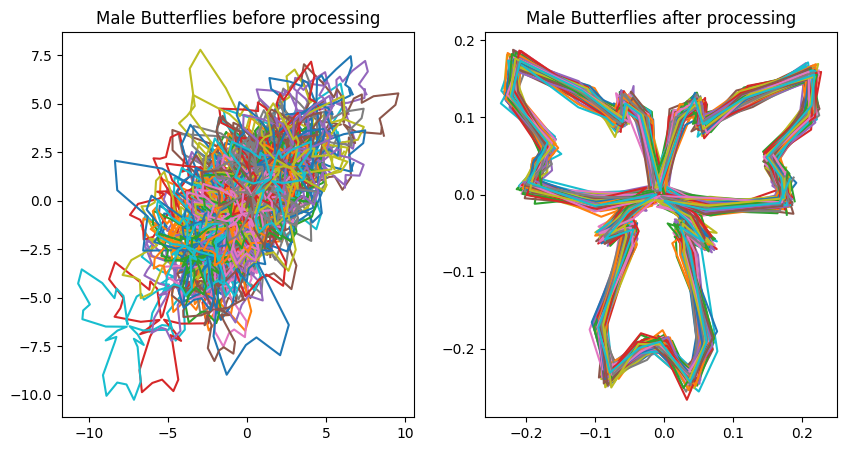

In [6]:
## Displaying the male butterflies shapes before and after the processing

_, axs = plt.subplots(1, 2, figsize=(10, 5))

for i in range(Population_size) :
    axs[0].plot(Male_flies[i][:, 0], Male_flies[i][:, 1])
    axs[0].title.set_text("Male Butterflies before processing")

for i in range(Population_size) :
    axs[1].plot(Processed_Male_flies[i][:, 0], Processed_Male_flies[i][:, 1])
    axs[1].title.set_text("Male Butterflies after processing")

plt.show()

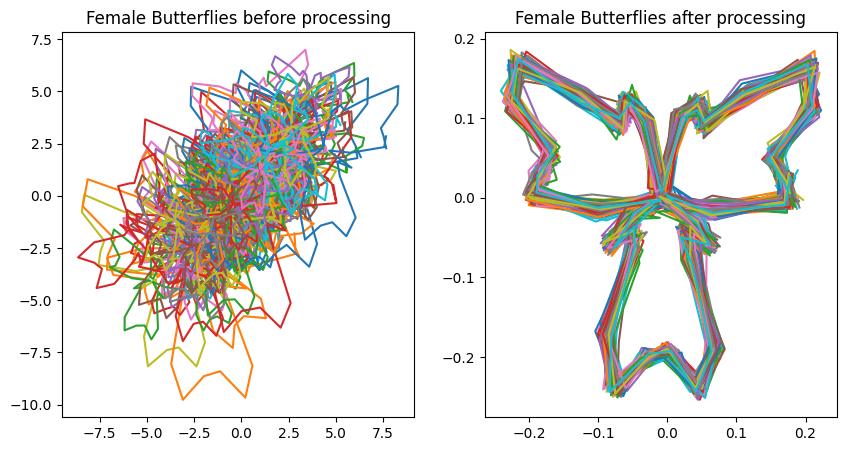

In [7]:
## Displaying the female butterflies shapes before and after the processing

_, axs = plt.subplots(1, 2, figsize=(10, 5))

for i in range(Population_size) :
    axs[0].plot(Female_flies[i][:, 0], Female_flies[i][:, 1])
    axs[0].title.set_text("Female Butterflies before processing")

for i in range(Population_size) :
    axs[1].plot(Processed_Female_flies[i][:, 0], Processed_Female_flies[i][:, 1])
    axs[1].title.set_text("Female Butterflies after processing")

plt.show()

In [8]:
## Concatenating all the data 

Total_Population = np.zeros((2*Population_size, 2*sampling_pts_nb))

for i in range(Population_size) :
    Total_Population[i] = np.concatenate((Processed_Male_flies[i][:, 0], Processed_Male_flies[i][:, 1]))

for i in range(Population_size) :
    Total_Population[Population_size+i] = np.concatenate((Processed_Female_flies[i][:, 0], Processed_Female_flies[i][:, 1]))


In [9]:
## Impementing the PCA by taking the 

cov_mat = np.cov(Total_Population.T)        
eig_val, eig_vec = np.linalg.eigh(cov_mat)

W = eig_vec[:, -3:]
Projected_pop = Total_Population @ W

In [10]:
Mean_shape = np.mean(Total_Population, axis=0)
eig_vec.shape

(80, 80)

c:\RoboDK\Python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  
c:\RoboDK\Python37\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


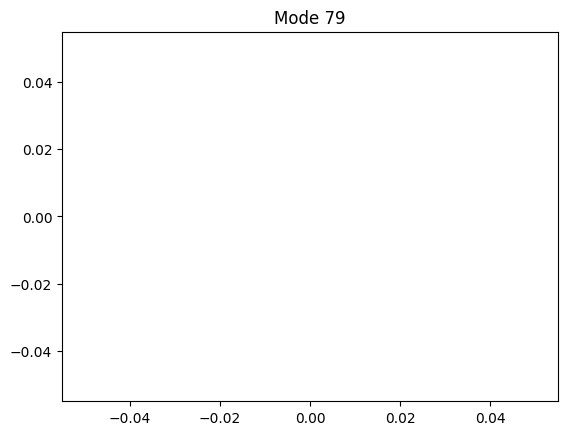

In [11]:
for i in range(1, 80): 
    plt.plot(Mean_shape[:sampling_pts_nb]+4*np.sqrt(eig_val[-i])*eig_vec[-i, :sampling_pts_nb], Mean_shape[sampling_pts_nb:]+4*np.sqrt(eig_val[-i])*eig_vec[-i, sampling_pts_nb:])
    plt.plot(Mean_shape[:sampling_pts_nb]-4*np.sqrt(eig_val[-i])*eig_vec[-i, :sampling_pts_nb], Mean_shape[sampling_pts_nb:]-4*np.sqrt(eig_val[-i])*eig_vec[-i, sampling_pts_nb:])
    plt.title("Mode "+str(i))
    plt.show()
    clear_output(wait=True)
    

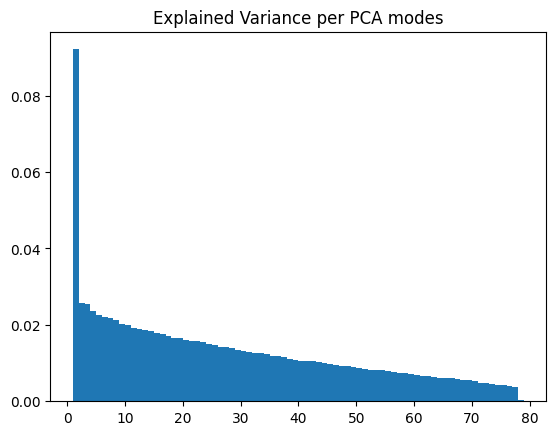

In [12]:
Explained_Var = []
for i in range(len(eig_val)-1, 0, -1) :
    Explained_Var.append(eig_val[i]/np.sum(eig_val))

B = range(1, len(eig_val))

plt.hist(B[:], bins=B, weights=Explained_Var)
plt.title("Explained Variance per PCA modes")
plt.show()

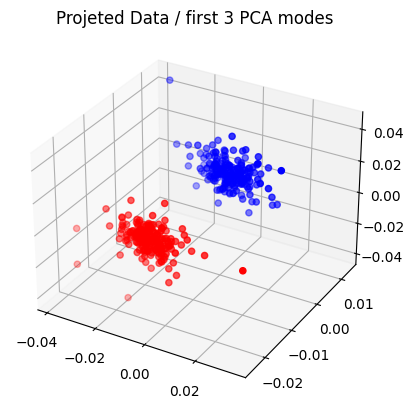

In [13]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(Projected_pop[:Population_size, 0], Projected_pop[:Population_size, 2], Projected_pop[:Population_size, 1], c='r')
ax.scatter(Projected_pop[Population_size:, 0], Projected_pop[Population_size:, 2], Projected_pop[Population_size:, 1], c='b')
ax.title.set_text("Projeted Data / first 3 PCA modes")
plt.show()

In [14]:
## Visualizing the data distributions for each class

df = pd.DataFrame()

df["PCA_Comp1"] = Projected_pop[:, 2]
df["PCA_Comp2"] = Projected_pop[:, 1]
df["PCA_Comp3"] = Projected_pop[:, 0]
df["Gender"] = ["Male"]*Population_size + ["Female"]*Population_size

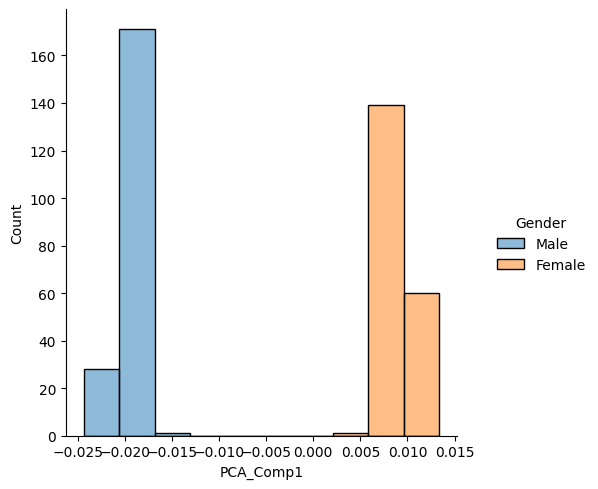

In [15]:
sns.displot(df, x="PCA_Comp1", hue="Gender")
plt.show()

In [16]:
Train_pop = []
N_train = 400
N_pts = 200

for i in range(N_train) :
    if i<N_train//2 :
        a, b = np.random.normal(0.9, 0.05, 2)
    else :
        a, b = np.random.normal(1.1, 0.05, 2)
    shape = generate_points([a, b], N_pts)
    Train_pop.append(np.concatenate((shape[:, 0], shape[:, 1])))
    
Train_pop = np.array(Train_pop)
Mean_shape = np.mean(Train_pop, axis=0)

t_cov = np.cov(Train_pop.T)

eig_val, eig_vec = np.linalg.eigh(t_cov)

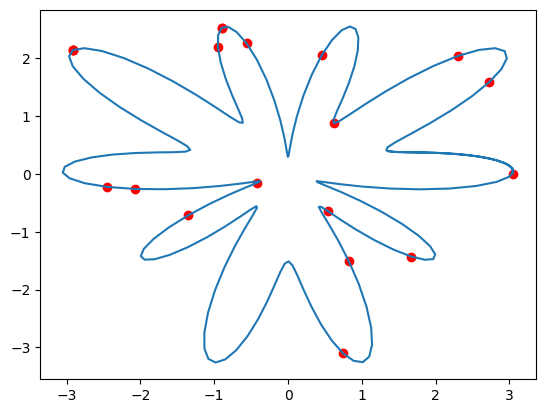

In [17]:
def far(idx, L, dis) :
    for i in range(len(L)):
        if abs(L[i]-idx)<dis :
            return False
    return True

a, b = np.random.uniform(0.5, 1.5, 2)
Test_shape = generate_points([a, b], N_pts)

N_land = 20
Lanmarks_ind = []
for i in range(N_land) :
    idx = np.random.randint(0, N_pts)
    while idx in Lanmarks_ind and far(idx, Lanmarks_ind, 10) :
        idx = np.random.randint(0, N_pts)
    Lanmarks_ind.append(idx)

Control_points = Test_shape[Lanmarks_ind, :]

plt.plot(Test_shape[:, 0], Test_shape[:,1])
plt.scatter(Test_shape[Lanmarks_ind, 0], Test_shape[Lanmarks_ind,1], c='r')
plt.show()

In [18]:
Train_pop.shape, W.shape

((400, 400), (80, 3))

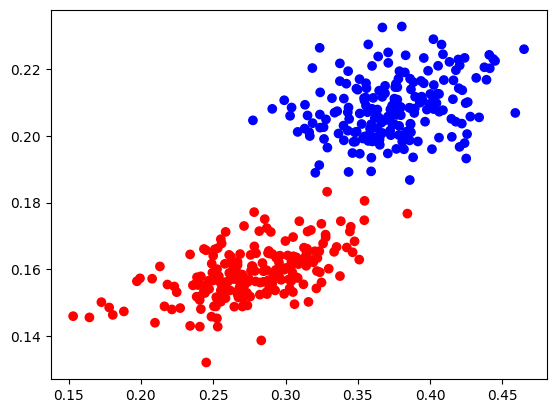

In [19]:
W = eig_vec[-2:]
Proj_pop = Train_pop @ W.T


C = ['r']*(N_train//2) + ['b']*(N_train//2)
plt.scatter(Proj_pop[:, 0], Proj_pop[:, 1], c=C)
plt.show()

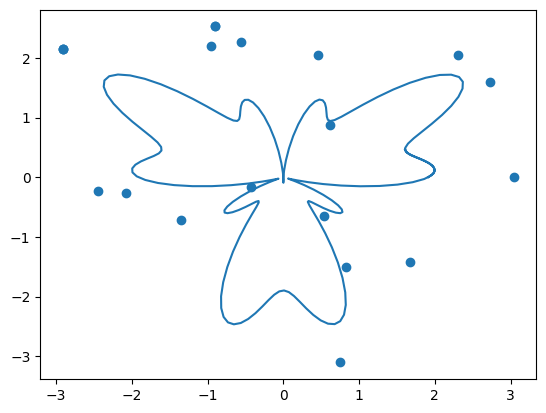

In [20]:
plt.scatter(Control_points[:, 0], Control_points[:, 1])
plt.plot(Mean_shape[:N_pts], Mean_shape[N_pts:])
plt.show()
Control_points = np.concatenate((Control_points[:, 0], Control_points[:, 1]))

In [21]:
def loss(Lanmarks_ind, Mean_shape, Control_points) :
    l = 0
    for i in range(len(Lanmarks_ind)) :
        l += (Mean_shape[Lanmarks_ind[i]]-Control_points[i])**2 + (Mean_shape[Lanmarks_ind[i]+N_pts]-Control_points[i+N_land])**2
    return l

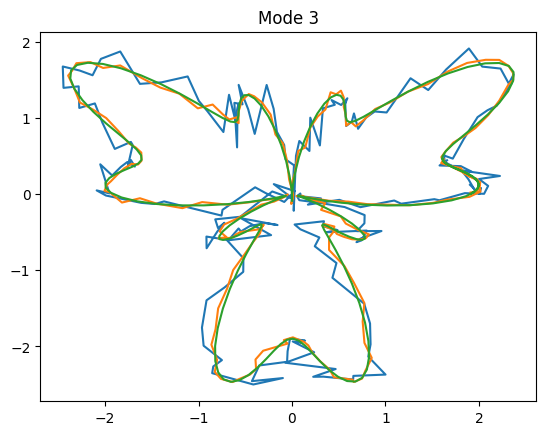

In [22]:
for i in range(1, 4): 
    plt.plot(Mean_shape[:N_pts]+np.sqrt(eig_val[-i])*eig_vec[-i, :N_pts], Mean_shape[N_pts:]+np.sqrt(eig_val[-i])*eig_vec[-i, N_pts:])
    plt.title("Mode "+str(i))
plt.show()

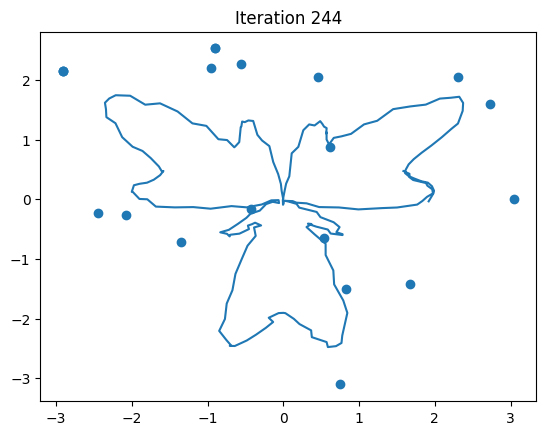

In [23]:
from IPython.display import clear_output
from copy import deepcopy

Actual_model = deepcopy(Mean_shape) 
N_modes = 20 
e = loss(Lanmarks_ind, Actual_model, Control_points)
step = 0.005
n=0

for i in range(1, N_modes+1) :
    n=0
    step_i = step*eig_val[-i]
    while loss(Lanmarks_ind, Actual_model+step_i*eig_vec[-i], Control_points)<e :
        Actual_model += step_i*eig_vec[-i]
        e = loss(Lanmarks_ind, Actual_model, Control_points)
        plt.scatter(Control_points[:N_land], Control_points[N_land:])
        plt.plot(Actual_model[:N_pts], Actual_model[N_pts:])
        plt.title("Iteration "+str(n))
        plt.show()
        clear_output(wait=True)
        n+=1
        
        
    while loss(Lanmarks_ind, Actual_model-step_i*eig_vec[-i], Control_points)<e :
        Actual_model -= step_i*eig_vec[-i]
        e = loss(Lanmarks_ind, Actual_model, Control_points)
        plt.scatter(Control_points[:N_land], Control_points[N_land:])
        plt.plot(Actual_model[:N_pts], Actual_model[N_pts:])
        plt.title("Iteration "+str(n))
        plt.show()
        clear_output(wait=True)
        n+=1
